In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("data/countries.csv")
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1, inplace = True)
df.head(2)

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates


In [4]:
# Checking the missing observation
df.isna().sum()

country      1
latitude     1
longitude    1
name         0
dtype: int64

In [6]:
# Droping the missing observation
df = df.dropna()

In [7]:
df.columns

Index(['country', 'latitude', 'longitude', 'name'], dtype='object')

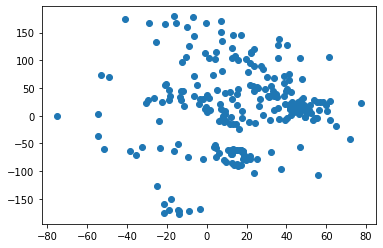

In [8]:
# Scatter plot for countries

plt.scatter(df.latitude, df.longitude)

## KMeans

In [9]:
from sklearn.cluster import KMeans

In [11]:
# By Assumation we have 7 continents
# k = 7

km = KMeans(n_clusters = 7)

xfeatures = df[['longitude', 'latitude']]

#fit n clusters

clusters = km.fit_predict(xfeatures)

# getting all the clusters

km.labels_

array([6, 6, 0, 1, 1, 6, 6, 1, 5, 5, 1, 4, 6, 3, 1, 6, 6, 1, 0, 6, 2, 6,
       6, 5, 2, 1, 0, 1, 1, 1, 0, 5, 5, 6, 1, 1, 0, 5, 2, 2, 6, 2, 4, 1,
       2, 0, 1, 1, 1, 2, 0, 6, 6, 6, 5, 6, 1, 1, 2, 1, 6, 6, 2, 5, 6, 5,
       6, 3, 1, 3, 6, 6, 2, 6, 1, 6, 1, 6, 2, 2, 1, 2, 2, 1, 2, 6, 1, 1,
       3, 2, 1, 6, 0, 5, 1, 6, 1, 6, 0, 6, 6, 6, 0, 5, 6, 6, 6, 6, 6, 1,
       6, 0, 5, 0, 0, 4, 5, 1, 0, 0, 6, 1, 0, 0, 6, 1, 6, 0, 2, 5, 6, 6,
       6, 6, 2, 6, 6, 6, 5, 3, 6, 2, 0, 0, 0, 3, 1, 2, 1, 6, 5, 0, 5, 1,
       0, 5, 3, 2, 3, 2, 1, 6, 6, 0, 3, 4, 3, 5, 1, 1, 4, 3, 0, 0, 6, 1,
       4, 1, 6, 2, 3, 1, 6, 5, 6, 6, 0, 5, 6, 3, 5, 5, 6, 0, 2, 6, 6, 6,
       2, 6, 2, 5, 1, 2, 1, 6, 5, 1, 2, 5, 2, 0, 0, 4, 3, 6, 6, 4, 6, 1,
       3, 0, 5, 6, 5, 1, 1, 0, 6, 1, 1, 1, 1, 0, 3, 4, 4, 6, 5, 5, 5, 5,
       5], dtype=int32)

In [12]:
clusters

array([6, 6, 0, 1, 1, 6, 6, 1, 5, 5, 1, 4, 6, 3, 1, 6, 6, 1, 0, 6, 2, 6,
       6, 5, 2, 1, 0, 1, 1, 1, 0, 5, 5, 6, 1, 1, 0, 5, 2, 2, 6, 2, 4, 1,
       2, 0, 1, 1, 1, 2, 0, 6, 6, 6, 5, 6, 1, 1, 2, 1, 6, 6, 2, 5, 6, 5,
       6, 3, 1, 3, 6, 6, 2, 6, 1, 6, 1, 6, 2, 2, 1, 2, 2, 1, 2, 6, 1, 1,
       3, 2, 1, 6, 0, 5, 1, 6, 1, 6, 0, 6, 6, 6, 0, 5, 6, 6, 6, 6, 6, 1,
       6, 0, 5, 0, 0, 4, 5, 1, 0, 0, 6, 1, 0, 0, 6, 1, 6, 0, 2, 5, 6, 6,
       6, 6, 2, 6, 6, 6, 5, 3, 6, 2, 0, 0, 0, 3, 1, 2, 1, 6, 5, 0, 5, 1,
       0, 5, 3, 2, 3, 2, 1, 6, 6, 0, 3, 4, 3, 5, 1, 1, 4, 3, 0, 0, 6, 1,
       4, 1, 6, 2, 3, 1, 6, 5, 6, 6, 0, 5, 6, 3, 5, 5, 6, 0, 2, 6, 6, 6,
       2, 6, 2, 5, 1, 2, 1, 6, 5, 1, 2, 5, 2, 0, 0, 4, 3, 6, 6, 4, 6, 1,
       3, 0, 5, 6, 5, 1, 1, 0, 6, 1, 1, 1, 1, 0, 3, 4, 4, 6, 5, 5, 5, 5,
       5], dtype=int32)

In [13]:
# checking if the clusters is the same like our km.labels(labels)

clusters is km.labels_

True

In [15]:
# checking centers/ centroids
km.cluster_centers_

array([[  98.1658357 ,   22.84469364],
       [ -69.1614569 ,    9.80010754],
       [  -1.6761501 ,   12.31644024],
       [ 156.84523619,   -7.98094281],
       [-164.167216  ,  -15.7990057 ],
       [  38.33169806,  -13.19471876],
       [  21.40254263,   44.1309991 ]])

In [16]:
# storing and map
df['cluster_continent'] = clusters
df.head(2)

,country,latitude,longitude,name,cluster_continent
0,AD,42.546245,1.601554,Andorra,6
1,AE,23.424076,53.847818,United Arab Emirates,6


In [17]:
df[df.cluster_continent == 3][['name', 'cluster_continent']]


,name,cluster_continent
13,Australia,3
67,Fiji,3
69,Micronesia,3
88,Guam,3
139,Marshall Islands,3
145,Northern Mariana Islands,3
157,New Caledonia,3
159,Norfolk Island,3
165,Nauru,3
167,New Zealand,3


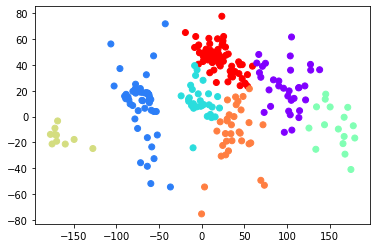

In [18]:
# plot our countries

plt.scatter(df.longitude, df.latitude, c = df.cluster_continent, cmap = 'rainbow')

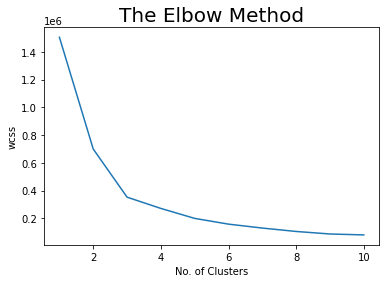

In [20]:
wcs = []

for k in range(1,11):
    km = KMeans(n_clusters = k,init='k-means++',n_init=10,max_iter=300,random_state = 0)
    km.fit(xfeatures)
    wcs.append(km.inertia_)
    
plt.plot(range(1, 11), wcs)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()      

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage

## Hierarchial Clustering via Scikit Learn


In [22]:
customer_data = pd.read_csv('data/shop.csv')
customer_data.head(3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [26]:
data = customer_data.iloc[:,3:5].values
data

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [27]:
import scipy.cluster.hierarchy as sch

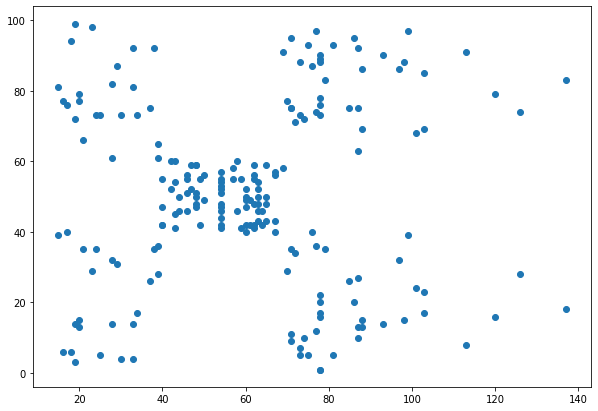

In [28]:
plt.figure(figsize= (10,7))
plt.scatter(data[:,0], data[:,1], cmap = 'rainbow')

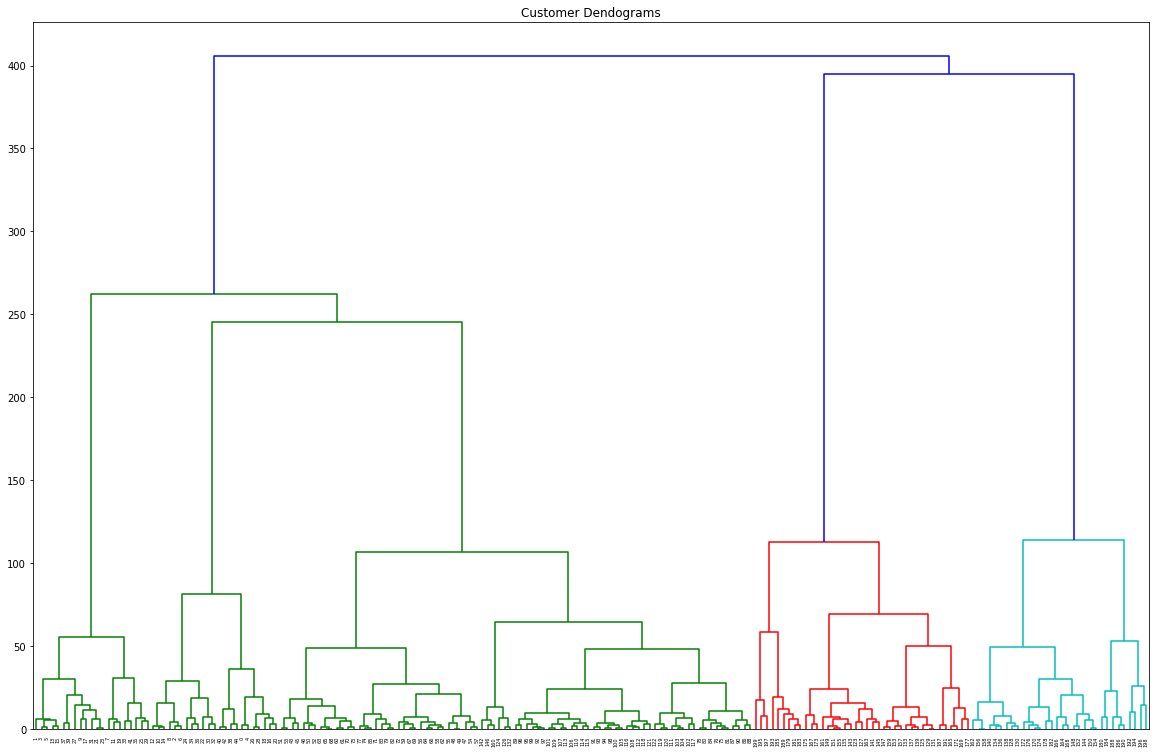

In [29]:
plt.figure(figsize = (20,13))
plt.title('Customer Dendograms')
dend = sch.dendrogram(sch.linkage(data, method = 'ward'))

In [33]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

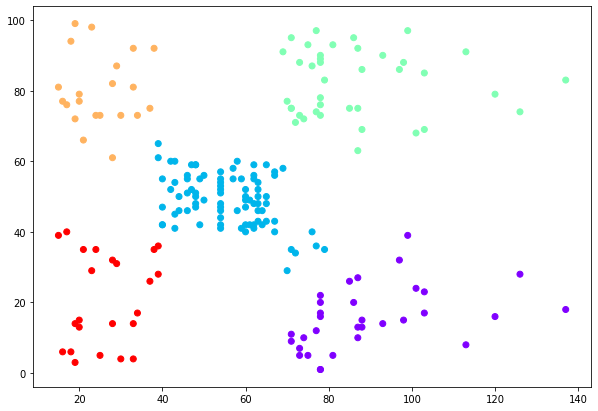

In [34]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')